In [1]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ia-hackathonn/SampleSubmission.csv
/kaggle/input/ia-hackathonn/Train (2).csv
/kaggle/input/ia-hackathonn/Test (4).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [3]:
df_train = pd.read_csv('../input/ia-hackathonn/Train (2).csv')
df_test = pd.read_csv('../input/ia-hackathonn/Test (4).csv')

In [4]:
df_train.shape

(2898, 1795)

In [5]:
df_test.shape

(1242, 1793)

In [6]:
df_train.head()

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,valence,arousal
0,1826,0.666593,-0.127720,0.030188,0.872432,0.066428,-0.688929,0.351763,0.962038,1.171841,...,4.268692,4.296591,0.405264,-2.827268,-2.004783,1.276288,2.222049,0.158765,5.0,6.0
1,1959,1.439036,2.939323,4.450541,4.889985,2.808758,0.174926,-0.264143,-0.265241,-2.430413,...,-2.719914,1.040441,0.272578,0.103977,3.468313,6.880353,8.626653,9.982868,1.0,7.0
2,688,-6.873479,2.620711,6.368775,-0.753867,0.504129,8.989532,6.353325,-0.452068,-1.600631,...,0.051793,-5.156834,-18.325062,2.098055,17.815147,0.043855,-3.858117,17.348724,1.0,6.0
3,765,7.343672,-1.043033,3.394326,12.075764,2.094330,-6.726448,-2.849046,-2.859351,-3.247879,...,11.696478,5.142235,-2.881666,-3.570459,-4.366352,-4.056002,-1.489292,-2.761847,2.0,8.0
4,610,8.988179,1.338421,-2.789729,-4.878788,-7.294619,-6.117245,-3.501986,-3.073579,0.061395,...,5.989770,5.809627,4.878367,3.895410,0.987760,0.012008,-0.732414,-3.816425,1.0,7.0


In [7]:
v=df_train["valence"]
a=df_train["arousal"]

In [8]:
a.unique()

array([6., 7., 8., 1., 5., 3., 2., 4., 9.])

In [9]:
v.unique()

array([5., 1., 2., 4., 3., 7.])

In [10]:
df_train.columns

Index(['ID', 'channel_0_timestep_0', 'channel_0_timestep_1',
       'channel_0_timestep_2', 'channel_0_timestep_3', 'channel_0_timestep_4',
       'channel_0_timestep_5', 'channel_0_timestep_6', 'channel_0_timestep_7',
       'channel_0_timestep_8',
       ...
       'channel_13_timestep_120', 'channel_13_timestep_121',
       'channel_13_timestep_122', 'channel_13_timestep_123',
       'channel_13_timestep_124', 'channel_13_timestep_125',
       'channel_13_timestep_126', 'channel_13_timestep_127', 'valence',
       'arousal'],
      dtype='object', length=1795)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Columns: 1795 entries, ID to arousal
dtypes: float64(1794), int64(1)
memory usage: 39.7 MB


In [12]:
Id=df_test["ID"]

In [13]:
df_test.head()

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_118,channel_13_timestep_119,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127
0,2649,0.726739,1.326801,0.419562,0.362655,1.877844,2.177589,0.881530,-0.177988,-0.107699,...,-4.538226,-6.132041,-4.516711,-4.155573,-6.451481,-5.906953,-1.217648,2.809138,5.387832,7.240309
1,1897,-2.290174,-1.321119,-4.212674,-2.404299,3.280274,5.224883,5.204860,3.618460,-2.801359,...,0.414722,3.437341,2.709642,-4.540618,-8.604247,-8.877815,-5.269321,4.677503,11.745440,11.366855
2,3973,-0.403232,-1.047966,-0.414630,-1.139564,-3.021573,-1.477372,0.307533,0.156880,0.410522,...,3.059209,0.482465,-0.488242,2.093967,0.955976,-1.962847,-0.305406,2.123710,2.303813,1.377429
3,3038,2.900014,0.531952,-1.543073,-2.262296,3.178448,5.404681,1.022172,1.415055,2.566809,...,-1.019735,1.108618,-1.554358,-6.510234,-8.960296,-3.087777,6.820467,12.740038,12.078416,2.254736
4,494,-3.372348,-1.855444,4.717225,1.641804,-8.900145,-11.168015,-9.589520,-12.598769,-9.765525,...,-12.035542,-12.719938,-9.132347,-10.269296,-6.274572,1.645681,-2.948617,-10.918031,-5.863556,-1.668832


In [14]:
df_train.drop("ID" , axis=1, inplace=True)
df_test.drop("ID" , axis=1, inplace=True)

Processing missing values

In [15]:
df_train.isnull().sum().sort_values(ascending =False).head(5)

channel_0_timestep_0      0
channel_10_timestep_65    0
channel_9_timestep_51     0
channel_9_timestep_50     0
channel_9_timestep_49     0
dtype: int64

Treatment of left parameters having missing values

# Artificial Neural Network

In [16]:
trainn=df_train.drop("valence",axis=1)

In [17]:
trainn

,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,channel_0_timestep_9,...,channel_13_timestep_119,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,arousal
0,0.666593,-0.127720,0.030188,0.872432,0.066428,-0.688929,0.351763,0.962038,1.171841,2.323957,...,1.378793,4.268692,4.296591,0.405264,-2.827268,-2.004783,1.276288,2.222049,0.158765,6.0
1,1.439036,2.939323,4.450541,4.889985,2.808758,0.174926,-0.264143,-0.265241,-2.430413,-4.575553,...,-6.864929,-2.719914,1.040441,0.272578,0.103977,3.468313,6.880353,8.626653,9.982868,7.0
2,-6.873479,2.620711,6.368775,-0.753867,0.504129,8.989532,6.353325,-0.452068,-1.600631,-5.637474,...,-14.872344,0.051793,-5.156834,-18.325062,2.098055,17.815147,0.043855,-3.858117,17.348724,6.0
3,7.343672,-1.043033,3.394326,12.075764,2.094330,-6.726448,-2.849046,-2.859351,-3.247879,3.040648,...,6.079260,11.696478,5.142235,-2.881666,-3.570459,-4.366352,-4.056002,-1.489292,-2.761847,8.0
4,8.988179,1.338421,-2.789729,-4.878788,-7.294619,-6.117245,-3.501986,-3.073579,0.061395,6.580954,...,1.013592,5.989770,5.809627,4.878367,3.895410,0.987760,0.012008,-0.732414,-3.816425,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,2.597523,-5.404371,-7.261963,-5.821558,-6.905499,-3.372167,-0.098528,-4.118333,-2.304121,2.807478,...,-11.493681,-8.553452,-4.326558,-2.547905,1.256500,8.988491,12.065654,9.896533,7.962224,3.0
2894,0.023456,-5.002498,-6.201032,-0.268211,1.768780,-2.178749,0.325151,7.422237,7.472040,4.527164,...,0.105220,-0.876480,1.165987,3.133366,2.900286,3.563294,3.955818,4.124920,7.065790,8.0
2895,0.418006,0.489591,0.399380,0.076094,-0.080600,0.114078,0.445269,0.719440,0.730063,0.520684,...,0.971298,2.296222,2.376399,1.750293,0.803550,-2.585437,-4.914431,-2.477296,-0.020557,5.0
2896,2.673160,1.955546,0.872103,-0.888802,-1.995294,-0.695374,1.180189,1.196407,0.016508,-1.190031,...,-5.766486,-6.545377,-3.103716,0.014929,-0.295690,1.441595,10.695235,12.365301,-1.123650,7.0


In [18]:
trainn=trainn.drop("arousal" , axis=1 )

In [19]:
trainn.shape

(2898, 1792)

In [20]:
X_train = np.array(trainn)
y_train = np.array(df_train[["valence","arousal"]])
X_test = np.array(df_test)

In [21]:
print('Shape of X_train {} \nShape of y_test {}\nShape of X_test {}'.format(X_train.shape,y_train.shape,X_test.shape))

Shape of X_train (2898, 1792) 
Shape of y_test (2898, 2)
Shape of X_test (1242, 1792)


#### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [23]:
y_train

array([[5., 6.],
       [1., 7.],
       [1., 6.],
       ...,
       [5., 5.],
       [4., 7.],
       [1., 7.]])

In [24]:
y_train = mms.fit_transform(y_train.reshape(-1,2))

In [25]:
y_train

array([[0.66666667, 0.625     ],
       [0.        , 0.75      ],
       [0.        , 0.625     ],
       ...,
       [0.66666667, 0.5       ],
       [0.5       , 0.75      ],
       [0.        , 0.75      ]])

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [27]:
regressor = Sequential()
regressor.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
regressor.add(Dropout(0.5))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dropout(0.25))
regressor.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
regressor.add(Dropout(0.25))
regressor.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
regressor.add(Dropout(0.25))
regressor.add(Dense(units=2,activation='relu',kernel_initializer='uniform'))

2022-07-17 15:56:45.654165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 15:56:45.781092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 15:56:45.782358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 15:56:45.784242: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [28]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [29]:
regressor.fit(X_train,y_train,epochs=250,batch_size=50)

2022-07-17 15:56:49.753581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
58/58 [==============================] - 2s 3ms/step - loss: 0.2846 - mean_absolute_error: 0.2846
Epoch 2/250
58/58 [==============================] - 0s 3ms/step - loss: 0.2647 - mean_absolute_error: 0.2647
Epoch 3/250
58/58 [==============================] - 0s 6ms/step - loss: 0.2605 - mean_absolute_error: 0.2605
Epoch 4/250
58/58 [==============================] - 0s 5ms/step - loss: 0.2620 - mean_absolute_error: 0.2620
Epoch 5/250
58/58 [==============================] - 0s 5ms/step - loss: 0.2608 - mean_absolute_error: 0.2608
Epoch 6/250
58/58 [==============================] - 0s 4ms/step - loss: 0.2582 - mean_absolute_error: 0.2582
Epoch 7/250
58/58 [==============================] - 0s 3ms/step - loss: 0.2554 - mean_absolute_error: 0.2554
Epoch 8/250
58/58 [==============================] - 0s 3ms/step - loss: 0.2579 - mean_absolute_error: 0.2579
Epoch 9/250
58/58 [==============================] - 0s 3ms/step - loss: 0.2536 - mean_absolute_error: 0.2536
Epoch 10/2

Text(0, 0.5, 'loss')

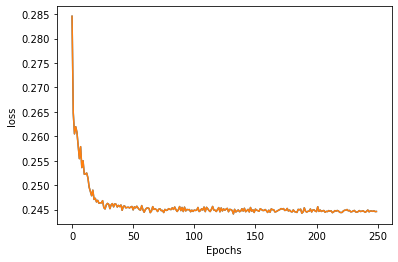

In [30]:
losses = regressor.history.history
losses = np.array(pd.DataFrame(losses))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')

In [31]:
y_pred = regressor.predict(X_test) 
y_pred_original = mms.inverse_transform(y_pred.reshape(-1,2))
y_pred_original = y_pred_original.tolist()


In [32]:
y_pred_original[0]

[3.0042619705200195, 6.718179702758789]

In [33]:
x=[i[0] for i in y_pred_original]
y=[i[1] for i in y_pred_original]

In [34]:
df=pd.DataFrame({"ID":Id,"x":x,"y":y})

In [35]:
sub1=df.to_csv("sub7.csv", index=False)

****

In [36]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(512, kernel_initializer='uniform', activation='relu'))

# The Hidden Layers :
NN_model.add(Dropout(0.5))
NN_model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(128, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(128, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
              
              
    # The Output Layer :
NN_model.add(Dense(2, kernel_initializer='uniform',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [37]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [38]:
NN_model.fit(X_train,y_train,epochs=250,batch_size=50 ,validation_split = 0.15,callbacks=callbacks_list)


Epoch 1/250
50/50 [==============================] - 2s 10ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - val_loss: 0.2571 - val_mean_absolute_error: 0.2571

Epoch 00001: val_loss improved from inf to 0.25713, saving model to Weights-001--0.25713.hdf5
Epoch 2/250
50/50 [==============================] - 0s 6ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - val_loss: 0.2582 - val_mean_absolute_error: 0.2582

Epoch 00002: val_loss did not improve from 0.25713
Epoch 3/250
50/50 [==============================] - 0s 5ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - val_loss: 0.2535 - val_mean_absolute_error: 0.2535

Epoch 00003: val_loss improved from 0.25713 to 0.25355, saving model to Weights-003--0.25355.hdf5
Epoch 4/250
50/50 [==============================] - 0s 7ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - val_loss: 0.2521 - val_mean_absolute_error: 0.2521

Epoch 00004: val_loss improved from 0.25355 to 0.25212, saving model to Weights-004--0.25212.hdf5
Ep

In [39]:
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               918016    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [40]:
y_pred = NN_model.predict(X_test) 
y_pred_original = mms.inverse_transform(y_pred.reshape(-1,2))
y_pred_original = y_pred_original.tolist()
x=[i[0] for i in y_pred_original]
y=[i[1] for i in y_pred_original]


In [41]:
df=pd.DataFrame({"ID":Id,"x":x,"y":y})
sub1=df.to_csv("sub780.csv", index=False)

****